In [19]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
import time
from request_get import *
from datetime import datetime
from dateutil import relativedelta

In [231]:
#get_fbref()
#get_transfermarkt()

In [339]:
current_year = 2022
year_to_subtract = 33
prima_giornata = pd.DataFrame(columns=["Stagione","Prima giornata"])
for i in range(year_to_subtract):
    year_url = f"{current_year - i}"
    url = f"https://www.transfermarkt.it/serie-a/spieltag/wettbewerb/IT1/plus/?saison_id={year_url}&spieltag=1"
    headers = {'User-Agent': 
                    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
    r= requests.get(url, headers=headers)
    r.status_code  

    soups = soup(r.text, 'html.parser')  # r.content 대신 r.text도 가능
    page=soups.find('td', class_=['zentriert no-border'])
    prima_giornata.loc[year_url,"Prima giornata"]=page.find('a').text.strip()



In [ ]:
prima_giornata.head(10)

In [401]:
from datetime import datetime
from dateutil import relativedelta

# La tua stringa di data
#make a for loop to convert in datatime the dataframe camp92

data_string = "01/ago/1992"
nascita_string="26/lug/1971"
# Mappa i nomi dei mesi a numeri
mesi = {
    "gen": 1, "feb": 2, "mar": 3, "apr": 4, "mag": 5, "giu": 6, "lug": 7, "ago": 8, "set": 9, "ott": 10, "nov": 11, "dic": 12
}

# Dividi la stringa utilizzando '/'
parti = data_string.split('/')
nasc_parti=nascita_string.split('/')

# Estrai il giorno, il mese e l'anno dalla stringa
giorno = int(parti[0])
mese = mesi[parti[1].lower()]  # Mappa il mese in minuscolo
anno = int(parti[2])

giorno_nasc = int(nasc_parti[0])
mese_nasc = mesi[nasc_parti[1].lower()]  # Mappa il mese in minuscolo
anno_nasc = int(nasc_parti[2])

# Crea un oggetto data
data_inizio = datetime(anno, mese, giorno)
nascita=datetime(anno_nasc,mese_nasc,giorno_nasc)
print(data_inizio)
# Get the relativedelta between two dates
relativedelta.relativedelta(data_inizio, nascita).years
#print('Years, Months, Days between two dates is')
#print(delta.years, 'Years,', delta.months, 'months,', delta.days, 'days')

1992-08-01 00:00:00


21

In [3]:
camp92=pd.read_excel("transfermarkt\SerieA1992-1993-Under21.xlsx")


In [4]:
from datetime import datetime
from dateutil import relativedelta
mesi = {
    "gen": 1, "feb": 2, "mar": 3, "apr": 4, "mag": 5, "giu": 6, "lug": 7, "ago": 8, "set": 9, "ott": 10, "nov": 11, "dic": 12
}
data_inizio = datetime(1992, 8, 1)
#convert the name of month in the date (example 28/nov/2002) in number ising the dictionary mesi for the column "Data di nascita"
for i in range(len(camp92)):
    parti = camp92.loc[i,"Nato"].split('/')
    giorno = int(parti[0])
    mese = mesi[parti[1].lower()]  # Mappa il mese in minuscolo
    anno = int(parti[2])
    data = datetime(anno, mese, giorno)
    camp92.loc[i,"Data di nascita"]=data
    anni=relativedelta.relativedelta(data_inizio, data).years
    camp92.loc[i,"Anni"]=anni

In [5]:
camp92.head()

,Giocatori,Ruolo,Nazione,Squadra,Presenze,Cambio,Minuti giocati,Reti,Nato,Eta,Data di nascita,Anni
0,Andrea Fortunato,Terzino sinistro,Italia,Genoa CFC,33,0,2970,3,26/lug/1971,20,1971-07-26,21.0
1,Giuseppe Favalli,Terzino sinistro,Italia,SS Lazio,32,5,2770,1,08/gen/1972,20,1972-01-08,20.0
2,Dino Baggio,Mediano,Italia,Juventus FC,32,6,2710,1,24/lug/1971,20,1971-07-24,21.0
3,Fabio Rossitto,Centrocampista di destra,Italia,Udinese Calcio,31,11,2559,1,21/set/1971,20,1971-09-21,20.0
4,Paolo Montero,Difensore centrale,Uruguay,Atalanta,27,1,2384,2,03/set/1971,20,1971-09-03,20.0


In [405]:
under=camp92[camp92["Anni"]<21]
under.head()


,Giocatori,Ruolo,Nazione,Squadra,Presenze,Cambio,Minuti giocati,Reti,Nato,Eta,Data di nascita,Anni
1,Giuseppe Favalli,Terzino sinistro,Italia,SS Lazio,32,5,2770,1,08/gen/1972,20,1972-01-08,20.0
3,Fabio Rossitto,Centrocampista di destra,Italia,Udinese Calcio,31,11,2559,1,21/set/1971,20,1971-09-21,20.0
4,Paolo Montero,Difensore centrale,Uruguay,Atalanta,27,1,2384,2,03/set/1971,20,1971-09-03,20.0
5,Christian Panucci,Terzino destro,Italia,Genoa CFC,30,9,2271,3,12/apr/1973,19,1973-04-12,19.0
6,Demetrio Albertini,Mediano,Italia,AC Milan,29,9,2148,2,23/ago/1971,20,1971-08-23,20.0


In [403]:
#get the row with anni < 21 and sum thw value of column "Minuti giocati"
camp92["Minuti giocati"][camp92["Anni"]<21].sum()
#under21["Minuti giocati"].sum()


29158

In [8]:
camp92[camp92["Anni"]<21]

,Giocatori,Ruolo,Nazione,Squadra,Presenze,Cambio,Minuti giocati,Reti,Nato,Eta,Data di nascita,Anni
5,Christian Panucci,Terzino destro,Italia,Genoa CFC,30,9,2271,3,12/apr/1973,19,1973-04-12,19.0
10,Stefano Sacchetti,Difensore centrale,Italia,UC Sampdoria,21,5,1712,0,10/ago/1972,19,1972-08-10,19.0
14,Mauro Bonomi,Difensore centrale,Italia,SS Lazio,10,4,754,0,23/ago/1972,19,1972-08-23,19.0
15,Alessandro Pierini,Difensore centrale,Italia,Udinese Calcio,11,4,721,0,22/mar/1973,19,1973-03-22,19.0
17,Marco Piovanelli,Centrocampo,Italia,Brescia Calcio,12,8,579,0,07/apr/1974,18,1974-04-07,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mauro Caroti,Centrocampo,Italia,US Ancona,0,0,0,0,02/feb/1974,18,1974-02-02,18.0
96,Christian Rossini,Centrocampo,Italia,US Ancona,0,0,0,0,14/apr/1975,17,1975-04-14,17.0
97,Ivan Martinelli,Portiere,Italia,Delfino Pescara 1936,0,0,0,0,24/feb/1973,19,1973-02-24,19.0
98,Fabio Marcucci,Difesa,Italia,Delfino Pescara 1936,0,0,0,0,02/mar/1975,17,1975-03-02,17.0


In [69]:
mesi = {
    "gen": 1, "feb": 2, "mar": 3, "apr": 4, "mag": 5, "giu": 6, "lug": 7, "ago": 8, "set": 9, "ott": 10, "nov": 11, "dic": 12
}
mins_played=pd.DataFrame(columns=["Minuti giocati TM","Minuti giocati FIX"])
current_year = 2022

# Define the number of years you want to subtract
year_to_subtract = 54

for i in range(year_to_subtract):
    # Calculate the year to use in the URL
    year_url = f"{current_year - i}-{current_year + 1 - i}"
    
    
    #players_fbref=pd.read_excel(f"SerieA{year_url}-Under21.xlsx")
    players_tm=pd.read_excel(f"transfermarkt\SerieA{year_url}-Under21.xlsx")
    for j in range(len(players_tm)):
        parti = players_tm.loc[j,"Nato"].split('/')
        giorno_nasc = int(parti[0])
        mese_nasc = mesi[parti[1].lower()]  # Mappa il mese in minuscolo
        anno_nasc = int(parti[2])
        data_nasc = datetime(anno_nasc, mese_nasc, giorno_nasc)
        players_tm.loc[j,"Data di nascita"]=data_nasc
        data_inizio=datetime(current_year-i, 8, 1)
        anni=relativedelta.relativedelta(data_inizio, data_nasc).years
        players_tm.loc[j,"Anni"]=anni
    under=players_tm[players_tm["Anni"]<21]
    mins_played.loc[year_url,"Minuti giocati FIX"]=under["Minuti giocati"].sum()
    #mins_played.loc[year_url,"Minuti giocati FB"]=players_fbref["Minuti giocati"].sum()
    mins_played.loc[year_url,"Minuti giocati TM"]=players_tm["Minuti giocati"].sum()
    #mins_played.loc[year_url,"TM - FB"]=mins_played.loc[year_url,"Minuti giocati TM"]-mins_played.loc[year_url,"Minuti giocati FB"]

   

In [29]:
mins_played.head(53)

,Minuti giocati TM,Minuti giocati FIX
2022-2023,46532,45572
2021-2022,43779,43060
2020-2021,45514,44079
2019-2020,49195,46669
2018-2019,61861,58666
2017-2018,51621,51306
2016-2017,52662,48348
2015-2016,39307,35956
2014-2015,41981,41981
2013-2014,48782,46824


In [70]:
 #normalize Minuti giocati to total minutes played in the league and create another column(from 2022-2023 to 2004-2005 divided for 3420 minutes, from 2003-2004 to 1988-1989 divided for 3060 minutes and from 1987-1988 to 1968-1969 divided for 2700 minutes)
#mins_played["Minuti giocati normalizzati Fbref"]=0
mins_played=mins_played.iloc[::-1]
mins_played["Minuti giocati normalizzati TM"]=0
mins_played["Minuti giocati normalizzati FIX"]=0
#mins_played["Minuti giocati normalizzati Fbref"][0:19]=mins_played["Minuti giocati FBref"][0:19]/3420
#mins_played["Minuti giocati normalizzati Fbref"][19:35]=mins_played["Minuti giocati FBref"][19:35]/3060
#mins_played["Minuti giocati normalizzati Fbref"][35:]=mins_played["Minuti giocati FBref"][35:]/2700
mins_played["Minuti giocati normalizzati TM"][0:19]=mins_played["Minuti giocati TM"][0:19]/(90*11*30*20)*100
mins_played["Minuti giocati normalizzati TM"][19:35]=mins_played["Minuti giocati TM"][19:35]/(90*11*34*20)*100
mins_played["Minuti giocati normalizzati TM"][35:]=mins_played["Minuti giocati TM"][35:]/(90*11*38*20)*100

mins_played["Minuti giocati normalizzati FIX"][0:19]=mins_played["Minuti giocati FIX"][0:19]/(90*11*30*20)*(100)
mins_played["Minuti giocati normalizzati FIX"][19:35]=mins_played["Minuti giocati FIX"][19:35]/(90*11*34*20)*100
mins_played["Minuti giocati normalizzati FIX"][35:]=mins_played["Minuti giocati FIX"][35:]/(90*11*38*20)*100

#convert ["Minuti giocati normalizzati FIX"] in float
mins_played["Minuti giocati normalizzati FIX"]=mins_played["Minuti giocati normalizzati FIX"].astype(float)


In [66]:
mins_played.head(53)

,Minuti giocati TM,Minuti giocati FIX,Minuti giocati normalizzati TM,Minuti giocati normalizzati FIX
1969-1970,36974,36720,6.224579,6.181818
1970-1971,30270,30265,5.09596,5.095118
1971-1972,40788,38322,6.866667,6.451515
1972-1973,43327,36878,7.294108,6.208418
1973-1974,40971,39470,6.897475,6.644781
1974-1975,46314,46079,7.79697,7.757407
1975-1976,39696,38504,6.682828,6.482155
1976-1977,25964,25964,4.371044,4.371044
1977-1978,47914,47914,8.06633,8.06633
1978-1979,54871,53092,9.237542,8.938047


In [71]:
mins_played["Minuti giocati normalizzati FIX"].describe()

count    54.000000
mean      5.858159
std       1.345997
min       3.509804
25%       4.952726
50%       5.672116
75%       6.420986
max      10.101852
Name: Minuti giocati normalizzati FIX, dtype: float64

In [63]:
from scipy.stats import f_oneway,kstest
import numpy as np
# Esegui il test di Kolmogorov-Smirnov per verificare se i dati seguono una distribuzione normale
# Sostituisci 'minuti_giocati' con il nome della colonna dei minuti giocati nel tuo DataFrame
ks_statistic, ks_p_value = kstest(mins_played['Minuti giocati normalizzati FIX'], 'norm')

# Valuta il risultato del test
alpha = 0.05  # Livello di significatività
if ks_p_value < alpha:
    print("I dati NON seguono una distribuzione normale.")
else:
    print("I dati seguono una distribuzione normale.")

# Stampare la statistica KS e il valore p per ulteriori riferimenti
print("Statistica KS:", ks_statistic)
print("Valore p:", ks_p_value)

I dati NON seguono una distribuzione normale.
Statistica KS: 0.9999999999999942
Valore p: 0.0


In [65]:
dati = np.array([46532, 43779, 45514, 49195, 61861, 51621])

# Specifica la distribuzione teorica o la distribuzione di riferimento
# Ad esempio, se stai cercando di confrontare con una distribuzione normale, puoi usare:
# distribuzione_di_riferimento = 'norm'

# Esegui il test Kolmogorov-Smirnov
kstest(dati, 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=43779, statistic_sign=-1)

In [61]:
f_oneway(mins_played["Minuti giocati normalizzati FIX"],axis=1)
#get all columns of the dataframe and put on the function f_oneway


TypeError: at least two inputs are required; got 1.

In [39]:
stats.kstest(mins_played['Minuti giocati normalizzati FIX'], stats.norm.cdf)

KstestResult(statistic=0.9999999999999942, pvalue=0.0, statistic_location=7.7215686274509805, statistic_sign=-1)

In [23]:
import Rbeast as rb
import numpy as np


INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast.irreg(),set print.options = 0 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast.irreg(),      set quiet = 1 

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 54
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  1 year = 12 months = 365 days
hasSeasonCmpnt: False | no periodic or seasonal component. The model Y=Trend+Error is fitted.
HasOutlierCmpt: False | If true, Y=Trend+Outlier+Error (experimental) is fitted instead of Y=Trend+Error 
Detrend     

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\Rbeast\plotbeast.py:294: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


#####################################################################
#                      Seasonal  Changepoints                       #
#####################################################################
 No seasonal/periodic component present (i.e., season='none')


#####################################################################
#                      Trend  Changepoints                          #
#####################################################################
.-------------------------------------------------------------------.
| Ascii plot of probability distribution for number of chgpts (ncp) |
.-------------------------------------------------------------------.
|Pr(ncp = 0 )=0.004|*                                               |
|Pr(ncp = 1 )=0.068|**********                                      |
|Pr(ncp = 2 )=0.261|*************************************           |
|Pr(ncp = 3 )=0.338|*********************************************** |
|Pr(ncp = 4 )=0.214|******

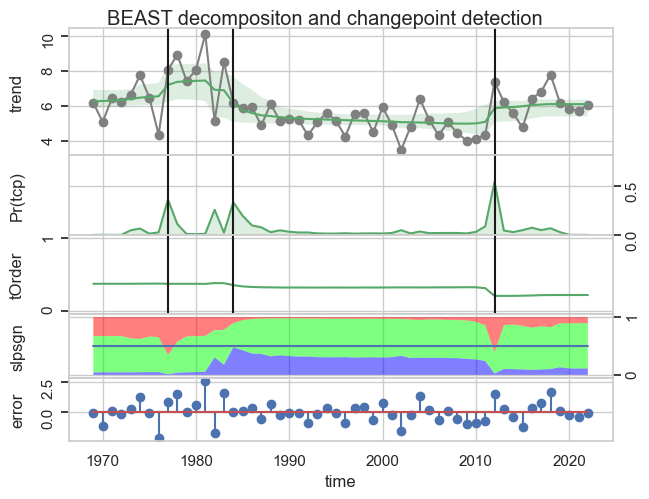

In [51]:
o=rb.beast(mins_played['Minuti giocati normalizzati FIX'], start=1969, deltat=1,period="1.0 year")
rb.plot(o)
rb.print(o)

In [62]:
#fai la media dei minuti giocati normalizzati ogni 10 anni e mettili in un nuovo dataframe
mins_played_10=pd.DataFrame(columns=["Minuti giocati normalizzati TM"])
mins_played_10.loc["1969-1976","Minuti giocati normalizzati TM"]=mins_played["Minuti giocati normalizzati TM"][0:8].mean()
mins_played_10.loc["1977-1984","Minuti giocati normalizzati TM"]=mins_played["Minuti giocati normalizzati TM"][8:16].mean()
mins_played_10.loc["1985-1992","Minuti giocati normalizzati TM"]=mins_played["Minuti giocati normalizzati TM"][16:24].mean()
mins_played_10.loc["1993-2000","Minuti giocati normalizzati TM"]=mins_played["Minuti giocati normalizzati TM"][24:32].mean()
mins_played_10.loc["2001-2008","Minuti giocati normalizzati TM"]=mins_played["Minuti giocati normalizzati TM"][32:40].mean()
mins_played_10.loc["2009-2017","Minuti giocati normalizzati TM"]=mins_played["Minuti giocati normalizzati TM"][40:48].mean()
mins_played_10.loc["2017-2022","Minuti giocati normalizzati TM"]=mins_played["Minuti giocati normalizzati TM"][48:].mean()

mins_played_10.loc["1969-1976","Minuti giocati normalizzati FIX"]=mins_played["Minuti giocati normalizzati FIX"][0:8].mean()
mins_played_10.loc["1977-1984","Minuti giocati normalizzati FIX"]=mins_played["Minuti giocati normalizzati FIX"][8:16].mean()
mins_played_10.loc["1985-1992","Minuti giocati normalizzati FIX"]=mins_played["Minuti giocati normalizzati FIX"][16:24].mean()
mins_played_10.loc["1993-2000","Minuti giocati normalizzati FIX"]=mins_played["Minuti giocati normalizzati FIX"][24:32].mean()
mins_played_10.loc["2001-2008","Minuti giocati normalizzati FIX"]=mins_played["Minuti giocati normalizzati FIX"][32:40].mean()
mins_played_10.loc["2009-2017","Minuti giocati normalizzati FIX"]=mins_played["Minuti giocati normalizzati FIX"][40:48].mean()
mins_played_10.loc["2017-2022","Minuti giocati normalizzati FIX"]=mins_played["Minuti giocati normalizzati FIX"][48:].mean()


mins_played_10.head(8)





,Minuti giocati normalizzati TM,Minuti giocati normalizzati FIX
1969-1976,6.403704,6.149032
1977-1984,8.055366,7.807534
1985-1992,6.037921,5.355817
1993-2000,5.629846,5.216522
2001-2008,5.319778,4.841484
2009-2017,5.561553,5.365032
2017-2022,6.612219,6.409534


Text(0.5, 1.0, 'Minuti giocati dai giocatori Under 21 in Serie A')

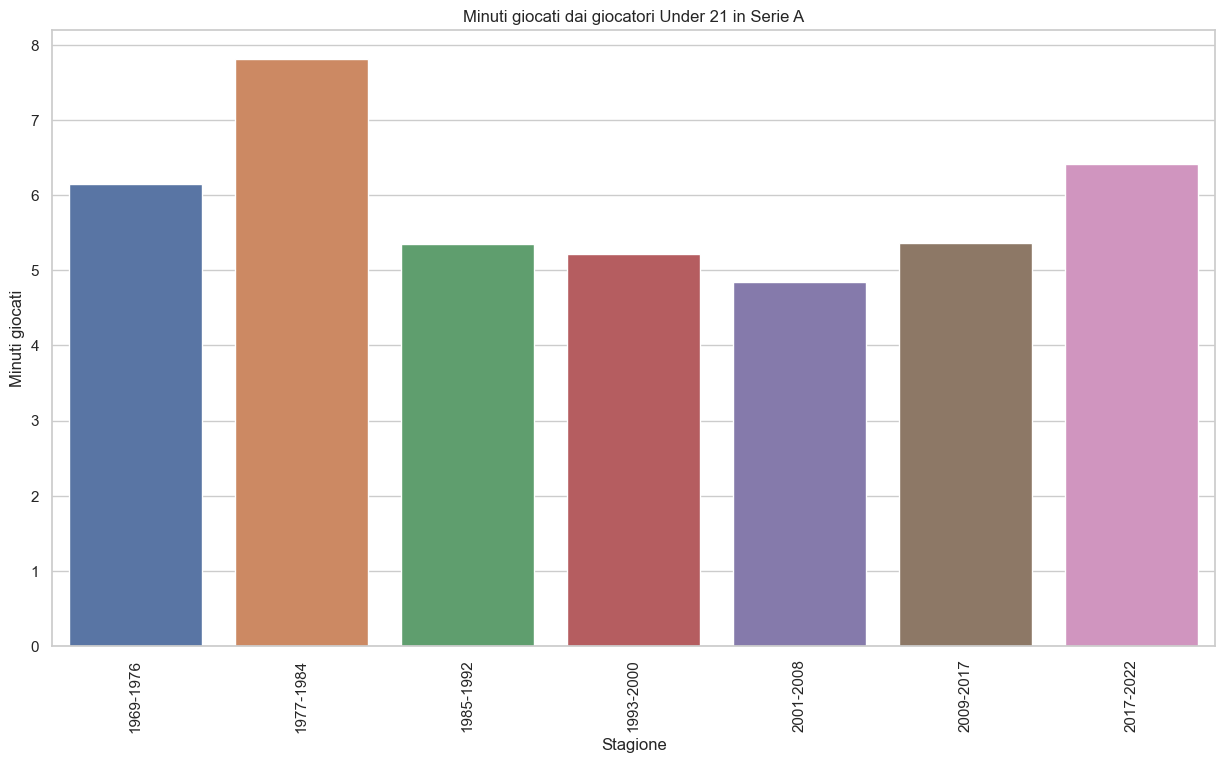

In [63]:
plt.figure(figsize=(15,8))
sns.barplot(x=mins_played_10.index, y=mins_played_10["Minuti giocati normalizzati FIX"])
plt.xticks(rotation=90)
plt.xlabel("Stagione")
plt.ylabel("Percentuale Minuti giocati")
plt.title("Minuti giocati dai giocatori Under 21 in Serie A ogni 8 anni")

Text(0.5, 1.0, 'Minuti giocati dai giocatori Under 21 in Serie A')

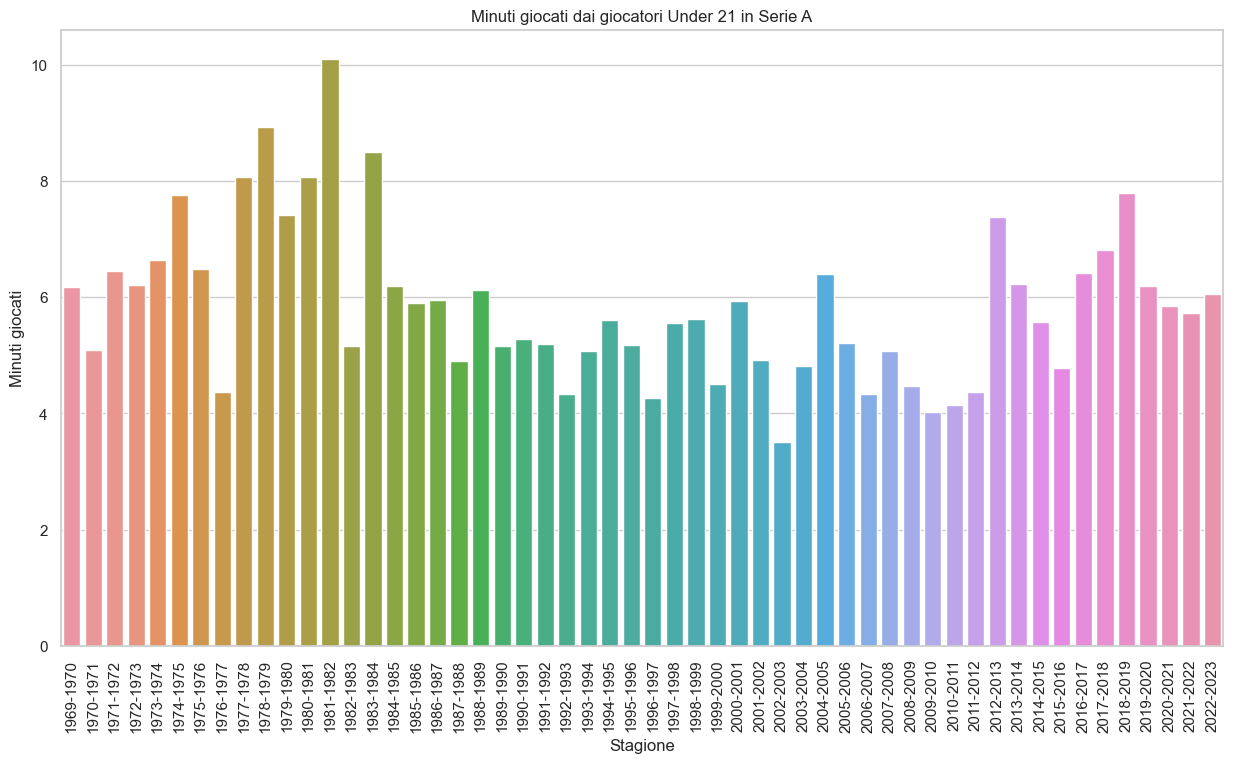

In [47]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
sns.barplot(x=mins_played.index, y=mins_played["Minuti giocati normalizzati FIX"])
plt.xticks(rotation=90)
plt.xlabel("Stagione")
plt.ylabel("Percentuale Minuti giocati")
plt.title("Minuti giocati dai giocatori Under 21 in Serie A")

Text(0, 0.5, 'Minuti giocati')

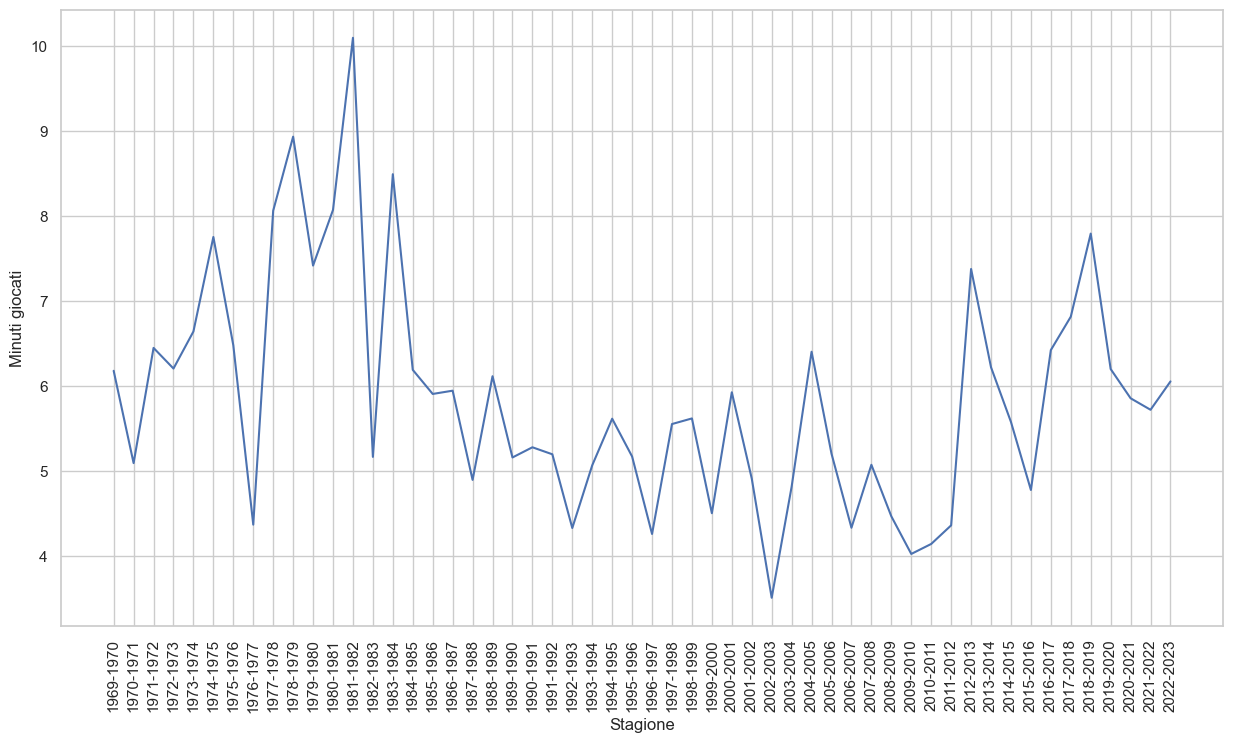

In [64]:
#print a line plot with the minutes played normalized
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
sns.lineplot(x=mins_played.index, y=mins_played["Minuti giocati normalizzati FIX"])
plt.xticks(rotation=90)
plt.xlabel("Stagione")
plt.ylabel("Minuti giocati")


Text(0.5, 1.0, 'Minuti giocati dai giocatori Under 21 in Serie A')

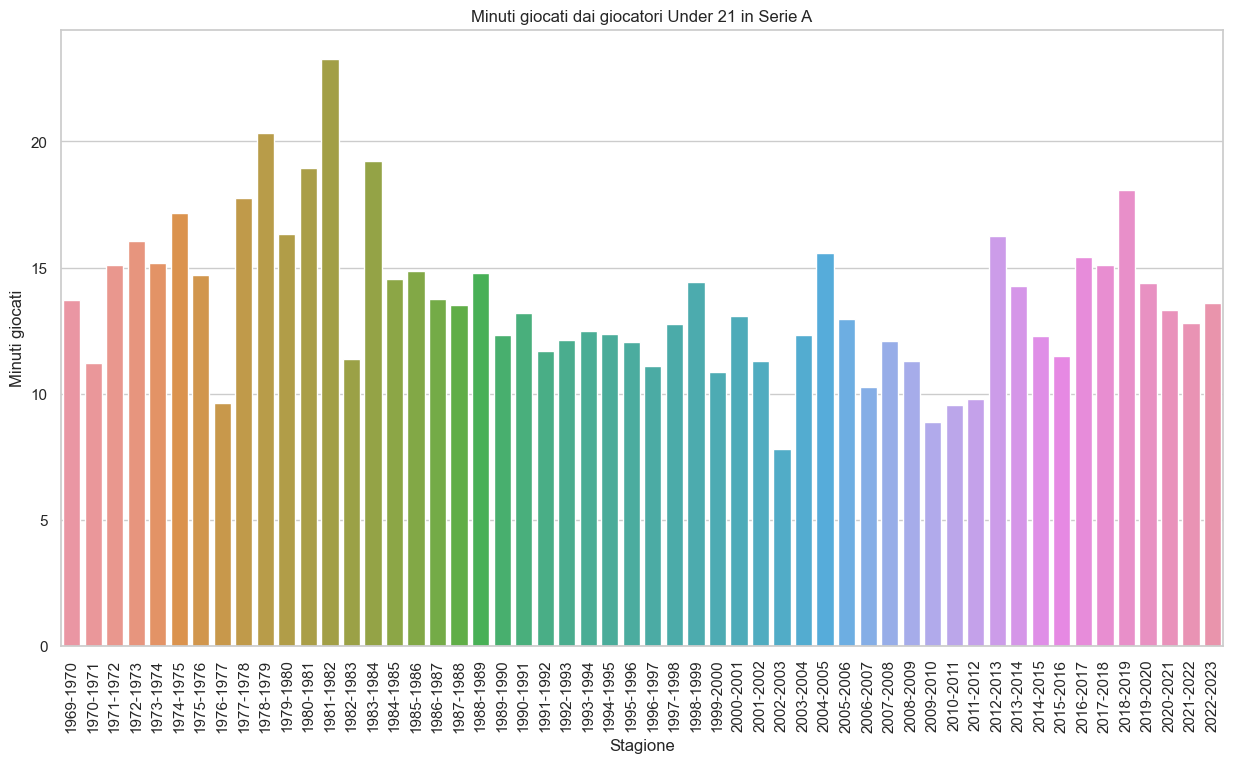

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(x=mins_played.index, y=mins_played["Minuti giocati normalizzati TM"])
plt.xticks(rotation=90)
plt.xlabel("Stagione")
plt.ylabel("Minuti giocati")
plt.title("Minuti giocati dai giocatori Under 21 in Serie A")


